<a href="https://colab.research.google.com/github/valenci007/Olympics_EDA/blob/main/Olympic_Medal_Count_by_Country_Akeem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**2024 Olympics: Medals vs GDP**
## **Project Type**
Explanatory Data Analysis (EDA)

## **Project Summary :**
This project is to analyse the medals per GDP of the countries looking at the performance of each country in the olympic dataset


## **Problem Statement :**
Analyse the country medal data and solve the following:
 - Which country has the highest medal
 - Average Medal per Country
 - Country with most gold medals
 - Country with most total medals
 - Most efficient country (medals per capita)
 - Region with most medals

### **Import Librabries**

In [ ]:
 # Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

### **Mount Goodle Drvie**

In [ ]:
#import the Data Source for Analysis
from google.colab import drive
drive.mount('MyDrive/', force_remount=True)

Mounted at MyDrive/


### **Loading DataSet**

In [ ]:
# Read the CSV file from Google Drive
path = 'MyDrive/MyDrive/Colab_Notebooks/olympics.csv'
df = pd.read_csv(path)

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())

Dataset Shape: (90, 10)

First few rows:


,country,country_code,region,gold,silver,bronze,total,gdp,gdp_year,population
0,United States,USA,North America,40,44,42,126,81695.19,2023,334.9
1,China,CHN,Asia,40,27,24,91,12614.06,2023,1410.7
2,Japan,JPN,Asia,20,12,13,45,33834.39,2023,124.5
3,Australia,AUS,Oceania,18,19,16,53,64711.77,2023,26.6
4,France,FRA,Europe,16,26,22,64,44460.82,2023,68.2


### **Data Infor and Description**


In [ ]:
# Check data types and missing values
print("Data Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
df.describe()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       90 non-null     object 
 1   country_code  90 non-null     object 
 2   region        90 non-null     object 
 3   gold          90 non-null     int64  
 4   silver        90 non-null     int64  
 5   bronze        90 non-null     int64  
 6   total         90 non-null     int64  
 7   gdp           90 non-null     float64
 8   gdp_year      90 non-null     int64  
 9   population    90 non-null     float64
dtypes: float64(2), int64(5), object(3)
memory usage: 7.2+ KB

Missing Values:
country         0
country_code    0
region          0
gold            0
silver          0
bronze          0
total           0
gdp             0
gdp_year        0
population      0
dtype: int64

Basic Statistics:


,gold,silver,bronze,total,gdp,gdp_year,population
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.644444,3.633333,4.255556,11.533333,24478.053556,2022.977778,69.027778
std,7.018933,6.797967,6.586607,19.782071,25547.857382,0.148231,213.286437
min,0.000000,0.000000,0.000000,1.000000,1014.210000,2022.000000,0.100000
25%,0.000000,0.000000,1.000000,2.000000,5815.180000,2023.000000,5.325000
50%,1.000000,1.000000,2.000000,5.000000,13061.185000,2023.000000,12.150000
75%,3.000000,3.000000,5.000000,9.000000,34484.677500,2023.000000,48.550000
max,40.000000,44.000000,42.000000,126.000000,103684.880000,2023.000000,1428.600000


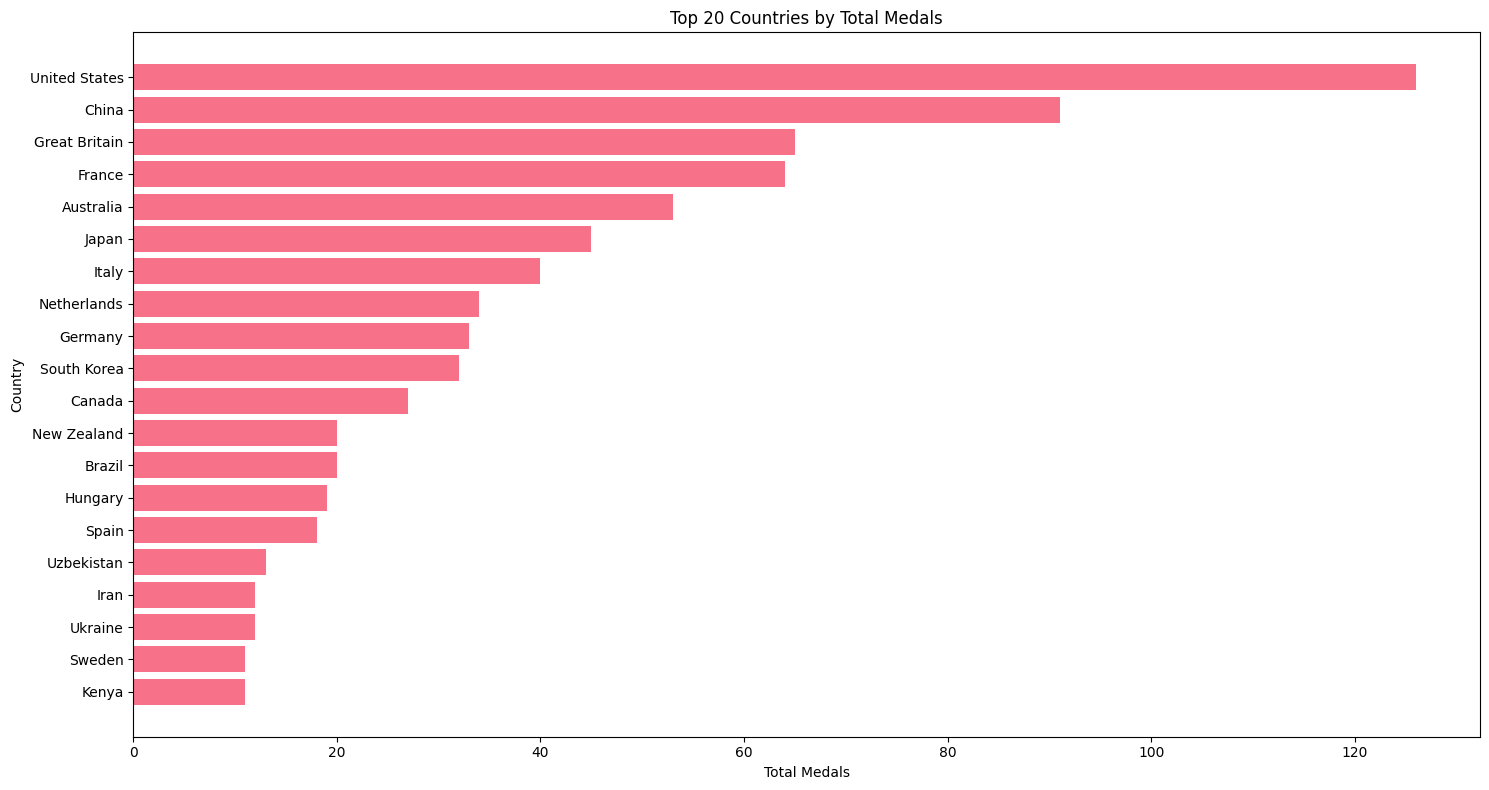

In [ ]:
# Top 20 countries by total medals
plt.figure(figsize=(15, 8))
top_20 = df.nlargest(20, 'total')
plt.barh(top_20['country'], top_20['total'])
plt.xlabel('Total Medals')
plt.ylabel('Country')
plt.title('Top 20 Countries by Total Medals')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

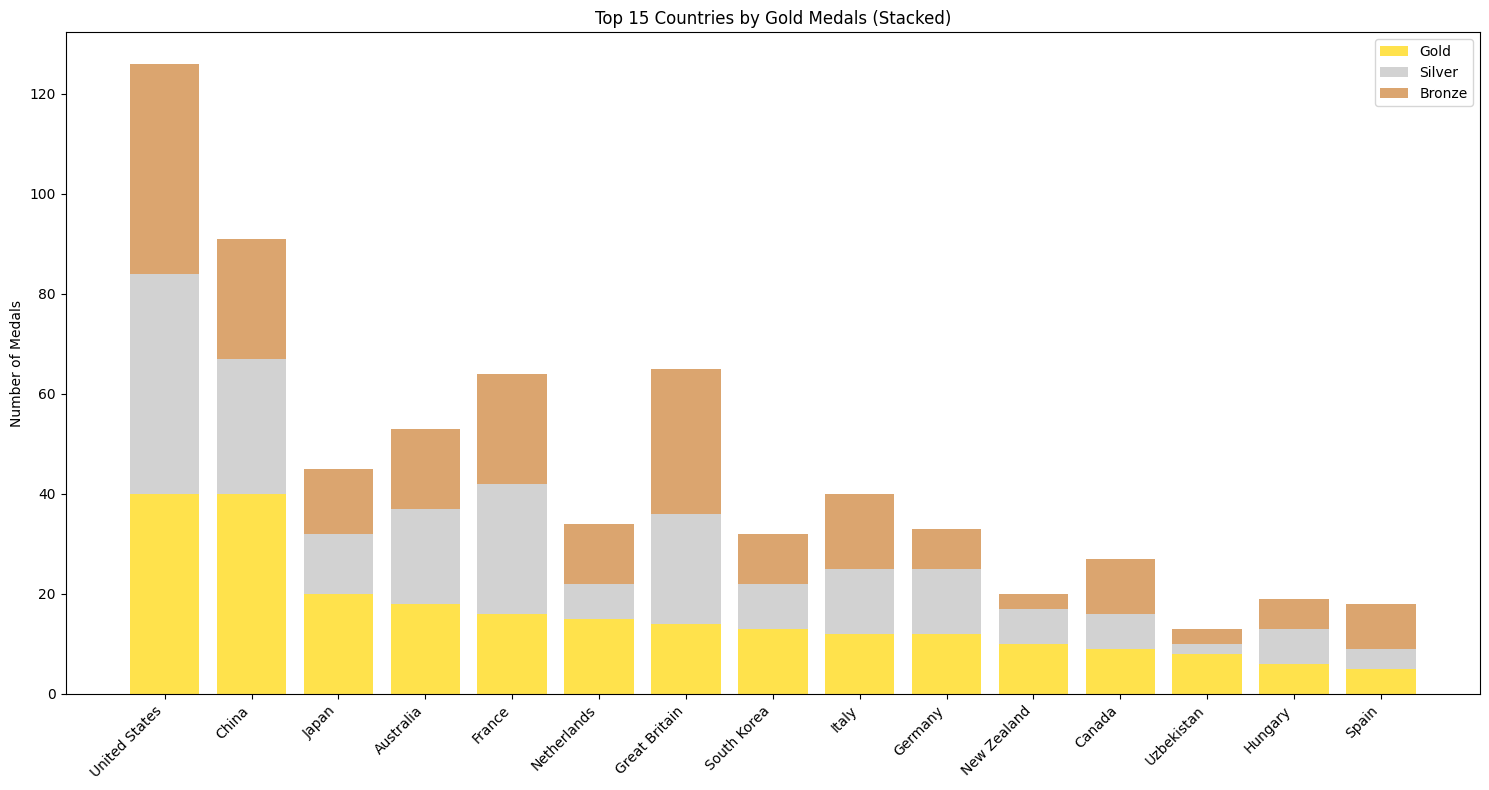

In [ ]:
# Gold medals comparison
plt.figure(figsize=(15, 8))
top_gold = df.nlargest(15, 'gold')
plt.bar(top_gold['country'], top_gold['gold'], color='gold', alpha=0.7, label='Gold')
plt.bar(top_gold['country'], top_gold['silver'], bottom=top_gold['gold'], color='silver', alpha=0.7, label='Silver')
plt.bar(top_gold['country'], top_gold['bronze'], bottom=top_gold['gold'] + top_gold['silver'], color='#cd7f32', alpha=0.7, label='Bronze')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Medals')
plt.title('Top 15 Countries by Gold Medals (Stacked)')
plt.legend()
plt.tight_layout()
plt.show()

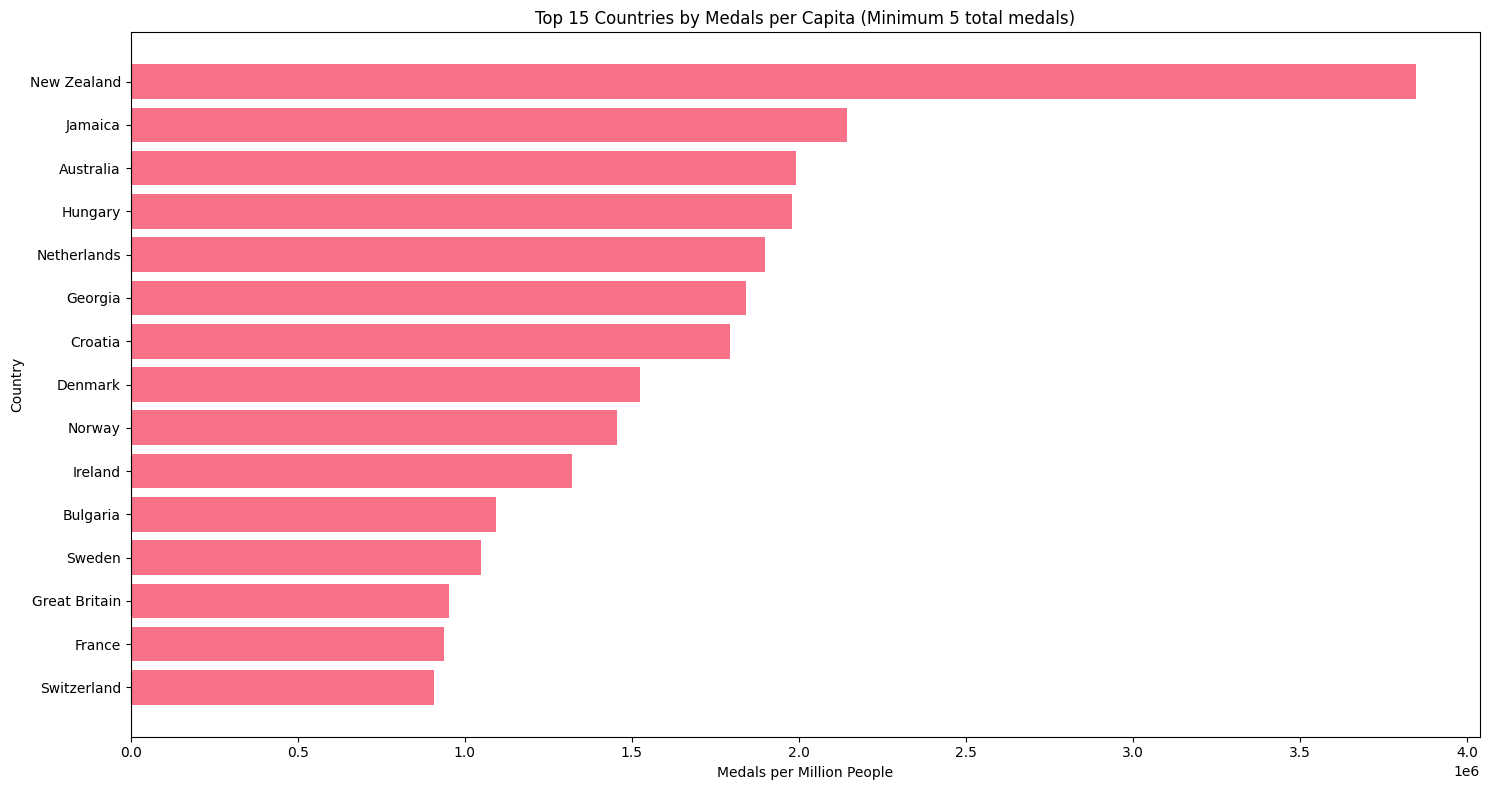

In [ ]:
# Calculate medals per million people
df['medals_per_million'] = (df['total'] / df['population']) * 1000000
df['gold_per_million'] = (df['gold'] / df['population']) * 1000000

# Top countries by medals per capita
plt.figure(figsize=(15, 8))
top_per_capita = df[df['total'] >= 5].nlargest(15, 'medals_per_million')
plt.barh(top_per_capita['country'], top_per_capita['medals_per_million'])
plt.xlabel('Medals per Million People')
plt.ylabel('Country')
plt.title('Top 15 Countries by Medals per Capita (Minimum 5 total medals)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

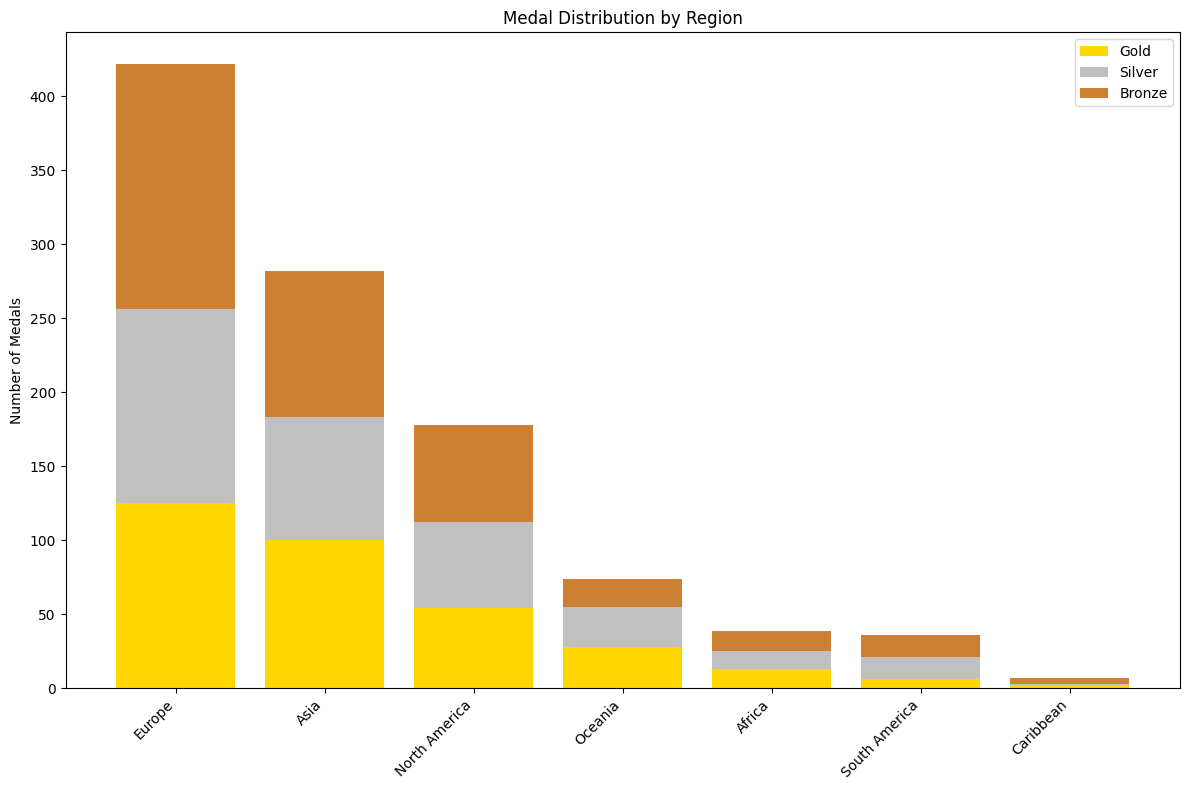

In [ ]:
# Group by region
regional_medals = df.groupby('region')[['gold', 'silver', 'bronze', 'total']].sum().sort_values('total', ascending=False)

# Regional medal distribution
plt.figure(figsize=(12, 8))
regions = regional_medals.index
gold = regional_medals['gold']
silver = regional_medals['silver']
bronze = regional_medals['bronze']

plt.bar(regions, gold, label='Gold', color='gold')
plt.bar(regions, silver, bottom=gold, label='Silver', color='silver')
plt.bar(regions, bronze, bottom=gold+silver, label='Bronze', color='#cd7f32')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Medals')
plt.title('Medal Distribution by Region')
plt.legend()
plt.tight_layout()
plt.show()

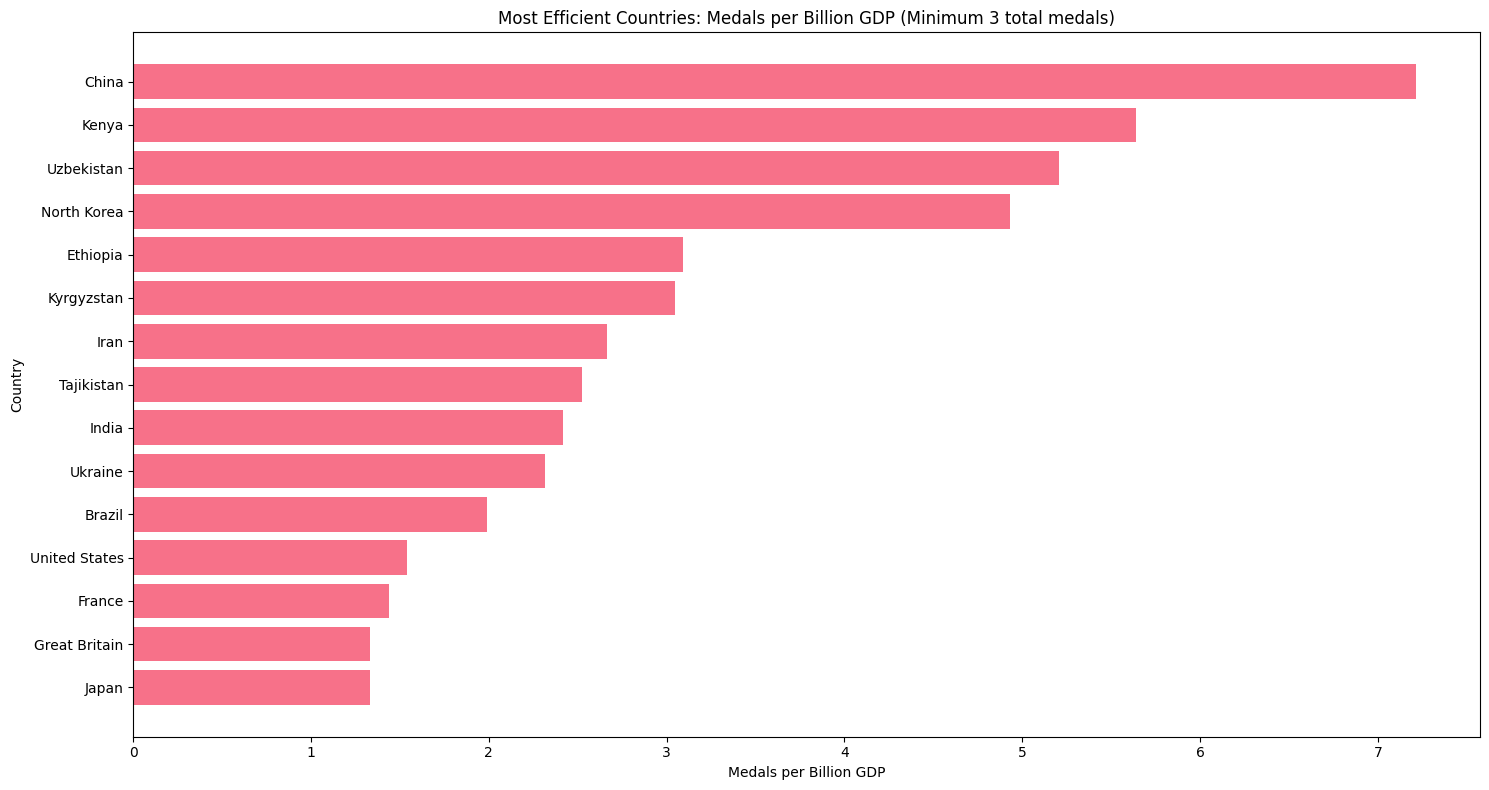

In [ ]:
# Calculate efficiency metrics
df['medals_per_billion_gdp'] = df['total'] / (df['gdp'] / 1000)  # Medals per billion GDP

# Top efficient countries
plt.figure(figsize=(15, 8))
efficient_countries = df[df['total'] >= 3].nlargest(15, 'medals_per_billion_gdp')
plt.barh(efficient_countries['country'], efficient_countries['medals_per_billion_gdp'])
plt.xlabel('Medals per Billion GDP')
plt.ylabel('Country')
plt.title('Most Efficient Countries: Medals per Billion GDP (Minimum 3 total medals)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Print some interesting statistics
print("OLYMPIC MEDALS ANALYSIS SUMMARY")
print("=" * 50)
print(f"Total countries analyzed: {len(df)}")
print(f"Total medals awarded: {df['total'].sum()}")
print(f"Average medals per country: {df['total'].mean():.1f}")
print(f"Country with most gold medals: {df.loc[df['gold'].idxmax(), 'country']} ({df['gold'].max()} gold)")
print(f"Country with most total medals: {df.loc[df['total'].idxmax(), 'country']} ({df['total'].max()} total)")
print(f"Most efficient country (medals per capita): {df.loc[df['medals_per_million'].idxmax(), 'country']}")
print(f"Region with most medals: {regional_medals.index[0]} ({regional_medals.iloc[0]['total']} total medals)")

OLYMPIC MEDALS ANALYSIS SUMMARY
Total countries analyzed: 90
Total medals awarded: 1038
Average medals per country: 11.5
Country with most gold medals: United States (40 gold)
Country with most total medals: United States (126 total)
Most efficient country (medals per capita): Grenada
Region with most medals: Europe (422 total medals)
